# Producing figures with multi-channel images

In [1]:
#%load_ext autoreload
#%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from microfilm.dataset import MultipageTIFF
from microfilm import microplot

## Load images

Here we used the ```dataset``` module to load some data. This is not a requirement at all. Your images should simply be Numpy arrays and you can load them as you wish.

In [3]:
data = MultipageTIFF('../tests/test_folders/test_multipage_good')

In [4]:
image1 = data.load_frame(data.channel_name[0], 0)
image2 = data.load_frame(data.channel_name[1], 0)

In [5]:
print(f'image shape: {image1.shape}')
print(f'image type: {image1.dtype}')

image shape: (196, 171)
image type: uint16


## Convert image to display with chosen colormap

### colormap name

Use a colormap name from Matplotlib or any of "pure_red", "pure_green", "pure_blue" for colormaps ranging from black to a pure RGB color.

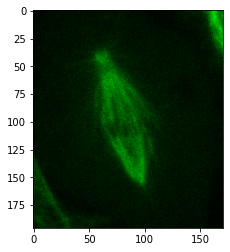

In [6]:
im_red = microplot.colormap_from_name(image1, cmap_name='pure_green', flip_map=False, rescale_type='min_max')
plt.imshow(im_red);

### colormap hex

Alternatively, you can also use a hexadecimal encoding of a color to create an colormap ranging from black to that color.$

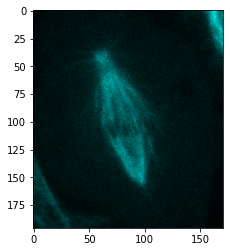

In [7]:
heximage = microplot.colormap_from_colorhex(image1, cmap_hex='#00ffff')
plt.imshow(heximage);

## Combining images

You can combined up to three images with their color maps.

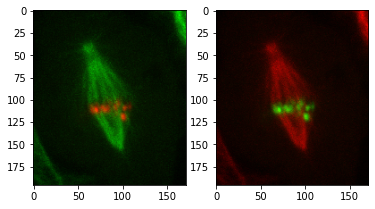

In [8]:
im1_mapped = microplot.colormap_from_name(image1, cmap_name='pure_green')
im2_mapped = microplot.colormap_from_name(image2, cmap_name='pure_red')

im1_mapped_b = microplot.colormap_from_name(image1, cmap_name='pure_red')
im2_mapped_b = microplot.colormap_from_name(image2, cmap_name='pure_green')

combined = microplot.combine_image([im1_mapped, im2_mapped])
combined_b = microplot.combine_image([im1_mapped_b, im2_mapped_b])

fig, ax = plt.subplots(1,2)
ax[0].imshow(combined)
ax[1].imshow(combined_b);

## Direct conversion

To save some steps you can also directly use a list of images and of colormaps to create a combined image:

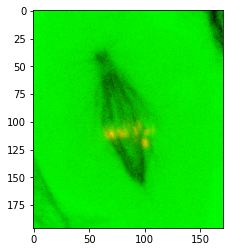

In [9]:
converted = microplot.multichannel_to_rgb(images=[image1, image2], cmaps=['pure_green', 'pure_red'], flip_map=[True, False])
plt.imshow(converted);

This works also with pure Numpy arrays:

In [10]:
multi_channel = np.stack([image1, image2],axis=0)
print(f'array shape: {multi_channel.shape}')

array shape: (2, 196, 171)


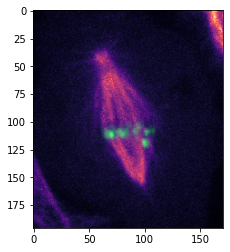

In [11]:
converted = microplot.multichannel_to_rgb(images=multi_channel, cmaps=['magma', 'pure_green'])
plt.imshow(converted);

## Direct plot

Finally, you can directy plot as multi-channel image using the ```microshow``` function which accepts the same options as the conversion functions defined above. With defaults, this is what you obtain:

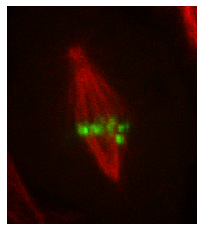

In [12]:
microplot.microshow(images=multi_channel);

Additionally, you can add a scale bar to your plot. You only need to defined the ```unit``` you use e.g. um, the size per pixel ```unit_per_pixel``` e.g. 0.5um/pixels, and the size of the scale bar ```scalebar_units``` in your unit e.g. 40um:

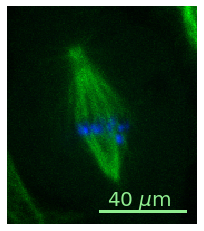

In [13]:
fig, ax = microplot.microshow(images=multi_channel, cmaps=['pure_green', 'pure_blue'],
                              scalebar=True, unit='um', unit_per_pix=0.5, scalebar_units=40,
                              scale_text_centered=True, scale_color='lightgreen', scale_font_size=20);

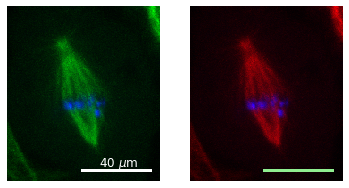

In [14]:
fig, ax = plt.subplots(1,2)
microplot.microshow(images=multi_channel, cmaps=['pure_green', 'pure_blue'],
                              scalebar=True, unit_per_pix=0.5, scalebar_units=40, unit='um', 
                    scale_text_centered=True, scale_color='white', ax=ax[0]);
microplot.microshow(images=multi_channel, cmaps=['pure_red', 'pure_blue'],
                              scalebar=True, unit_per_pix=0.5, scalebar_units=40, unit='um',
                    scale_font_size=None, scale_color='lightgreen', ax=ax[1]);

In [15]:
fig.savefig('test.png', bbox_inches = 'tight',
    pad_inches = 0, dpi=600)

In [16]:
fig.savefig('test.pdf', bbox_inches = 'tight',
    pad_inches = 0, dpi=600)